In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Bidirectional, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)                   │ (None, 185, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_12 (MaxPooling1D)      │ (None, 92, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 92, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_13 (Conv1D)                   │ (None, 90, 32)              │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_13 (MaxPooling1D)      │ (None, 45, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 45, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_24 (Bidirectional)     │ (None, 45, 128)             │          49,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 45, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_25 (Bidirectional)     │ (None, 45, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 45, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_26 (Bidirectional)     │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 5)                   │             505 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267,133 (1.02 MB)

 Trainable params: 267,133 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.8627 - loss: 0.4936 - val_accuracy: 0.9556 - val_loss: 0.1600
Epoch 2/60
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - accuracy: 0.9497 - loss: 0.1874 - val_accuracy: 0.9644 - val_loss: 0.1272
Epoch 3/60
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - accuracy: 0.9582 - loss: 0.1458 - val_accuracy: 0.9665 - val_loss: 0.1131
Epoch 4/60
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - accuracy: 0.9664 - loss: 0.1204 - val_accuracy: 0.9730 - val_loss: 0.0958
Epoch 5/60
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - accuracy: 0.9697 - loss: 0.1059 - val_accuracy: 0.9740 - val_loss: 0.0886
Epoch 6/60
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - accuracy: 0.9728 - loss: 0.0970 - val_accuracy: 0.9771 - val_loss: 0.0800
Epoch 7/60
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - accuracy: 0.9730 - loss: 0.0939 - val_accuracy: 0.9782 - val_loss: 0.0776
Epoch 8/60
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - accuracy: 0.9767 -

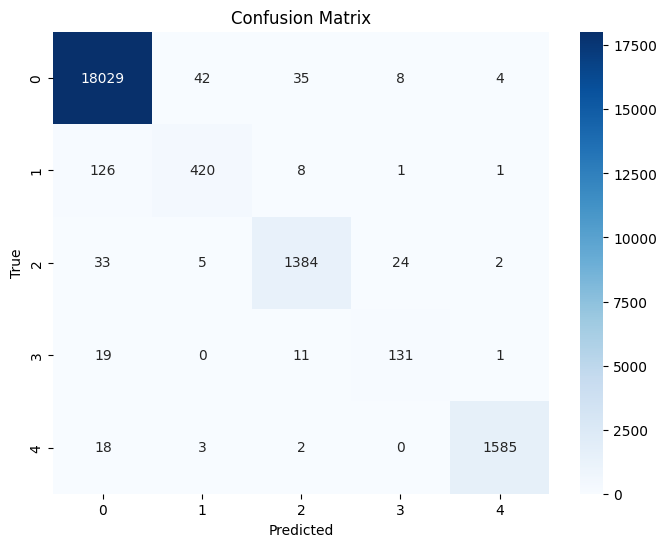

In [11]:
class MITBIHDataset:
    def __init__(self, train_path, test_path):
        self.train_path = train_path
        self.test_path = test_path
        self.num_classes = None

    def load_data(self):
        # Load CSV files
        self.train_data = pd.read_csv(self.train_path, header=None)
        self.test_data = pd.read_csv(self.test_path, header=None)

    def preprocess_data(self):
        # Split features and labels
        X_train, y_train = self.train_data.iloc[:, :-1].values, self.train_data.iloc[:, -1].values
        X_test, y_test = self.test_data.iloc[:, :-1].values, self.test_data.iloc[:, -1].values

        # Normalize features using StandardScaler
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Reshape input for CNN-LSTM (samples, time steps, features)
        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

        # Split training data into train and validation sets
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

        # Compute class weights to handle imbalance (using the original labels before one-hot encoding)
        class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
        class_weights = dict(zip(np.unique(y_train), class_weights))

        # Convert labels to categorical for model training
        self.num_classes = len(np.unique(y_train))
        y_train = to_categorical(y_train, num_classes=self.num_classes)
        y_val = to_categorical(y_val, num_classes=self.num_classes)
        y_test = to_categorical(y_test, num_classes=self.num_classes)

        return X_train, y_train, X_val, y_val, X_test, y_test, class_weights


class ECGRNNModel:
    def __init__(self, input_shape, num_classes, learning_rate=1e-3):
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        self.model = self.build_model()
        self.model.summary()  # Print model architecture

    def build_model(self):
        model = Sequential()

        # Input layer
        model.add(Input(shape=self.input_shape))  

        # CNN layers for feature extraction
        model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(0.2))
        model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(0.2))

        # Bidirectional LSTM for sequence modeling
        model.add(Bidirectional(LSTM(64, return_sequences=True)))
        model.add(Dropout(0.2))
        model.add(Bidirectional(LSTM(64, return_sequences=True)))
        model.add(Dropout(0.2))
        model.add(Bidirectional(LSTM(64)))

        # Fully connected layers
        model.add(Dense(100, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(self.num_classes, activation='softmax'))

        # Compile the model
        optimizer = Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        return model

    def train(self, X_train, y_train, X_val, y_val, class_weights, epochs=50, batch_size=64):
        # Set up EarlyStopping callback
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        # Train the model with early stopping
        self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                       validation_data=(X_val, y_val), #class_weight=class_weights,
                       callbacks=[early_stopping])

    def evaluate(self, X_test, y_test):
        y_pred = self.model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true = np.argmax(y_test, axis=1)

        # Compute classification report
        report = classification_report(y_true, y_pred_classes, digits=4)

        print("Test Classification Report:\n")
        print(report)

        # Save the report to a file
        with open("classification_report.txt", "w") as f:
            f.write(report)

        # Confusion Matrix
        conf_matrix = confusion_matrix(y_true, y_pred_classes)
        print("Confusion Matrix:\n")
        print(conf_matrix)

        # Plot Confusion Matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(self.num_classes), yticklabels=np.arange(self.num_classes))
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

        return report


if __name__ == "__main__":
    dataset = MITBIHDataset(train_path='/kaggle/input/mit-bih-dataset/mitbih_train.csv',
                            test_path='/kaggle/input/mit-bih-dataset/mitbih_test.csv')
    dataset.load_data()
    X_train, y_train, X_val, y_val, X_test, y_test, class_weights = dataset.preprocess_data()

    model = ECGRNNModel(input_shape=(X_train.shape[1], X_train.shape[2]), num_classes=dataset.num_classes)
    model.train(X_train, y_train, X_val, y_val, class_weights, epochs=60, batch_size=64)

    report = model.evaluate(X_test, y_test)
